In [29]:
import pandas as pd
import numpy as np
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
# df.shape

In [131]:
df.head(2)
#tenure → total number of months the customer has been with the company.
#Contract → the type of agreement they’re currently on, not necessarily the original

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df["SeniorCitizen"].head()

0    0
1    0
2    0
3    0
4    0
Name: SeniorCitizen, dtype: int64

In [18]:
df["Partner"].head() # spouse

0    Yes
1     No
2     No
3     No
4     No
Name: Partner, dtype: object

In [20]:
df["Dependents"].head() # childrens / parents / any who care

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [22]:
df["tenure"].head() # tenent interms of months

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

In [31]:
df["TotalCharges"].head() # total charges / fee is in object dtype ---?
# changing to numerical

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [35]:
# Check how many blank entries (" ") exist
print((df["TotalCharges"] == " ").sum())
# This is the reason in the dataset they were "categorical variable columns"

11


In [77]:
# Understading those 11 records
missing_total_charges = df[df["TotalCharges"] == " "]
missing_total_charges.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [74]:
# Checking out what those 11 records have on montly charge
missing_total_charges["MonthlyCharges"]

488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
5218    19.70
6670    73.35
6754    61.90
Name: MonthlyCharges, dtype: float64

In [61]:
# 11 records have contract as well
missing_total_charges["Contract"]

488     Two year
753     Two year
936     Two year
1082    Two year
1340    Two year
3331    Two year
3826    Two year
4380    Two year
5218    One year
6670    Two year
6754    Two year
Name: Contract, dtype: object

In [63]:
# Lets fill in using One year → 12 months and Two year -> 24 months for tenure column so its gonna be not null
def fill_tenure(row):
    if row["tenure"] == 0:
        if row["Contract"] == "One year":
            return 12
        elif row["Contract"] == "Two year":
            return 24
        else:  # Month-to-Month
            return 1
    return row["tenure"]

missing_total_charges["tenure"] = df.apply(fill_tenure, axis=1)
missing_total_charges.head()

C:\Users\joela\AppData\Local\Temp\ipykernel_4032\563114600.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_total_charges["tenure"] = df.apply(fill_tenure, axis=1)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,24,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,24,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,24,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,24,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,24,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [151]:
# based on tenure we going to fill TotalCharges column records
missing_total_charges["TotalCharges"] == " "  # recheck on those 11 is null

# My plan -> based on tenure in months & montly charge , lets fill in the Total Charges (expected a customer would pay in the future)

488     True
753     True
936     True
1082    True
1340    True
3331    True
3826    True
4380    True
5218    True
6670    True
6754    True
Name: TotalCharges, dtype: bool

In [288]:
# 1 year in missing_total_charges

one_year_charges = missing_total_charges[missing_total_charges['Contract'] == "One year"]['MonthlyCharges']
one_year_charges

5218    19.7
Name: MonthlyCharges, dtype: float64

In [289]:
# 2 year in missing_total_charges
two_year_charges = missing_total_charges[missing_total_charges['Contract'] == "Two year"]['MonthlyCharges']
two_year_charges

488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
6670    73.35
6754    61.90
Name: MonthlyCharges, dtype: float64

In [290]:
# “One year” or “Two year” plans might have slightly different monthly charges OBV based on their subscription model
# lets fill in contract-specific typical charges rather than a single global average.(based on our main dataset (df) )
# for churn modeling, using median by contract type is often safer than using the mean — it avoids skewing due to very high or very low monthly charges.
# but we need to refer documentaion to actually proceed with decision

In [102]:
# Exclude the missing rows from the main df for analysis
df_clean = df[~df.index.isin(missing_total_charges.index)].copy()
df_clean.shape
# df_clean.head()
# 7043 - 11 = 7032

(7032, 21)

In [103]:
df_clean["MonthlyCharges"].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [106]:
df_clean["tenure"].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

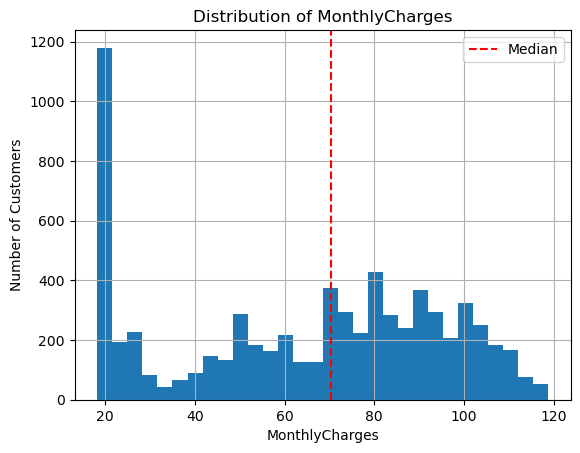

In [125]:
import matplotlib.pyplot as plt

# Ploting histogram
df_clean['MonthlyCharges'].hist(bins=30)
plt.axvline(df_clean['MonthlyCharges'].median(), color='red', linestyle='--', label='Median')
plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customers')
plt.title('Distribution of MonthlyCharges')
plt.legend()
plt.savefig('MonthlyCharges_Histogram.png')

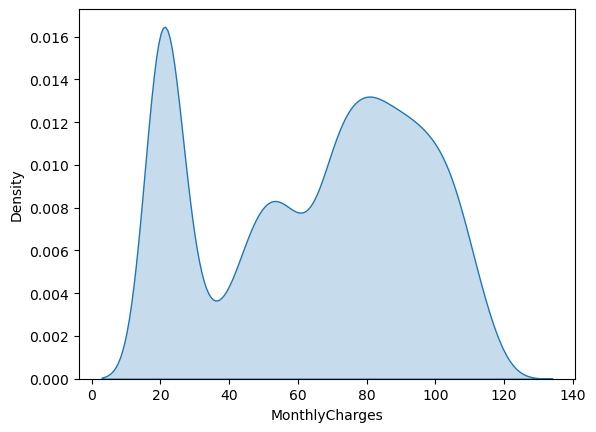

In [124]:
import seaborn as sns
sns.kdeplot(df['MonthlyCharges'], fill=True)
plt.savefig("MonthlyCharges_KDE.png", dpi=300, bbox_inches='tight')

## Looking into our Data to fill in the null Values of "1 year Contract"

In [220]:
"""
isolates the subset of valid (non-missing) MonthlyCharges records 
for customers who have 1-year or 2-year contracts seperately

1 year -> 1472 records
2 year -> 1685

"""
# One-year contracts
one_year_subset = df_clean[df_clean['Contract'] == 'One year']

In [263]:
service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies'
]
grouped_desc1 = one_year_subset.groupby(service_cols)['MonthlyCharges'].describe()

In [264]:
grouped_desc1.describe()

,count,mean,std,min,25%,50%,75%,max
count,287.000000,287.000000,223.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,5.128920,73.258477,1.038449,72.360105,72.865375,73.274303,73.660366,74.127700
std,18.259994,20.430375,0.626033,20.247728,20.352954,20.425616,20.507192,20.635585
min,1.000000,19.950502,0.000000,18.250000,19.600000,19.950000,20.300000,21.200000
25%,2.000000,58.984375,0.565685,57.675000,58.687500,58.975000,59.125000,59.150000
50%,3.000000,74.350000,1.001438,73.050000,73.675000,74.350000,75.075000,75.500000
75%,5.000000,90.127083,1.377273,89.550000,89.881250,90.225000,90.437500,90.625000
max,299.000000,115.422727,3.783021,110.800000,114.425000,115.575000,116.287500,118.600000


In [285]:
# check in to see, does the null record montly value is close to the population
df_clean[
    (df_clean['Contract'] == 'One year') &
    (df_clean['MonthlyCharges'] >= 19) &
    (df_clean['MonthlyCharges'] <= 20)
]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
146,6837-BJYDQ,Male,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.60,61.35,No
188,0956-SYCWG,Female,0,No,No,13,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.65,244.80,No
213,4709-LKHYG,Female,0,Yes,Yes,29,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,20.00,540.05,No
224,5961-VUSRV,Female,0,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.35,219.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6646,8249-THVEC,Male,0,Yes,Yes,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,997.75,No
6730,1272-ILHFG,Male,0,Yes,Yes,15,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,No
6766,9845-QOMAD,Male,0,Yes,Yes,14,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.75,309.35,No
6842,5546-QUERU,Male,0,No,No,13,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.95,257.00,No


In [256]:
missing_total_charges[missing_total_charges['Contract'] == "One year"]
"""
I verified the missing customer’s MonthlyCharges of 19.7 against other one-year contract customers with low charges. 
It fits well within the observed range, so using this value to calculate TotalCharges is reasonable and accurate.
"""

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.7,236.4,No


## Looking into our Data to fill in the null Values of "2 year Contract"

In [ ]:
# Two-year contracts
two_year_subset = df_clean[df_clean['Contract'] == 'Two year']

In [265]:
grouped_desc2 = two_year_subset.groupby(service_cols)['MonthlyCharges'].describe()

In [266]:
grouped_desc2.describe()

,count,mean,std,min,25%,50%,75%,max
count,219.000000,219.000000,148.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,7.694064,74.135942,1.035212,73.263470,73.784589,74.154795,74.494977,74.981050
std,32.276792,20.563411,0.539329,20.322125,20.490271,20.588507,20.652891,20.824014
min,1.000000,19.943797,0.000000,18.400000,19.600000,19.900000,20.275000,21.450000
25%,1.000000,59.661111,0.652399,58.700000,59.506250,59.750000,59.800000,59.875000
50%,2.000000,74.855556,1.058475,73.500000,74.475000,74.875000,75.075000,75.500000
75%,5.000000,92.300000,1.418405,92.300000,92.300000,92.300000,92.300000,92.925000
max,403.000000,114.995161,2.510229,111.300000,114.000000,115.050000,116.050000,118.750000


In [282]:
df_clean[
    (df_clean['Contract'] == 'Two year') &
    (df_clean['MonthlyCharges'] >= 19) &
    (df_clean['MonthlyCharges'] <= 85)
].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1149.000000,1149.000000,1149.000000,1149.000000
mean,0.058312,53.325500,42.324630,2389.812881
std,0.234434,19.120156,24.232545,1753.527207
min,0.000000,1.000000,19.050000,20.350000
25%,0.000000,43.000000,20.250000,1035.500000
50%,0.000000,60.000000,25.500000,1664.300000
75%,0.000000,70.000000,65.650000,3921.100000
max,1.000000,72.000000,85.000000,6185.150000


In [287]:
missing_total_charges[missing_total_charges['Contract'] == "Two year"].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,10.0,10.0,10.000000,10.00000
mean,0.0,0.0,43.590000,1046.16000
std,0.0,0.0,23.945654,574.69569
min,0.0,0.0,19.850000,476.40000
25%,0.0,0.0,21.525000,516.60000
50%,0.0,0.0,39.150000,939.60000
75%,0.0,0.0,60.437500,1450.50000
max,0.0,0.0,80.850000,1940.40000


In [150]:
"""
The missing TotalCharges rows for two-year contracts have MonthlyCharges that are well within the observed range of existing two-year customers 
(19.05–85). Using TotalCharges = MonthlyCharges × 24 is safe and won’t bias the model, because these values are realistic and the number of missing rows
is very small relative to the dataset.
"""

count    1685.000000
mean       60.872374
std        34.712210
min        18.400000
25%        24.050000
50%        64.450000
75%        90.550000
max       118.750000
Name: MonthlyCharges, dtype: float64

## Need to change dtype of TotalCharges , becoz its object

In [ ]:
# Convert to numeric
missing_total_charges["TotalCharges"] = pd.to_numeric(
    missing_total_charges["TotalCharges"], errors="coerce"
)
# Fill NaN with 0.0 sicne flaot
missing_total_charges["TotalCharges"] = missing_total_charges["TotalCharges"].fillna(0)

In [198]:
assumed_tenure = {
    'One year': 12,
    'Two year': 24,
}

# Compute estimated TotalCharges
missing_total_charges['TotalCharges'] = (
    missing_total_charges['Contract'].map(assumed_tenure) *
    missing_total_charges['MonthlyCharges']
)

C:\Users\joela\AppData\Local\Temp\ipykernel_4032\3996007116.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_total_charges['TotalCharges'] = (


In [199]:
missing_total_charges.head(1)
# confirming test case -> DONE! PRoceed

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,1261.2,No


### Now lets merge df_clean (without null values) & missing_total_charges (updated for null values)

In [200]:
df_clean.shape

(7032, 21)

In [201]:
missing_total_charges.shape

(11, 21)

In [204]:
# Before that i need to convert df_clean[TotalCharges] type to flaot64 to merge
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [205]:
df_clean['TotalCharges'] = df_clean['TotalCharges'].astype(float)

#### Merging both df_clean & missing_total_charges (Total : 7043 records)

In [213]:
df_merged = pd.concat([df_clean, missing_total_charges], axis=0)
df_merged.shape

(7043, 21)

In [ ]:
# Extarcting the dataset for further modeling

In [291]:
df_merged.to_csv("df_merged.csv", index=False)